# Les données météorologiques et l'Economie
Dans cette partie, nous croiserons les données météorologiques du Sénégal avec ses données économiques explorées précédemment.

### 1- Importations nécessaires

In [0]:
from pyspark.sql import functions as F
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 2- Chargement des données


In [0]:
# chargeaons les données mensuelles
df_mensual_data= spark.table("workspace.default.mensual_data")
df_mensual_data.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- date: date (nullable = true)
 |-- ipi_alim: double (nullable = true)
 |-- ipi_total: double (nullable = true)
 |-- cpi: double (nullable = true)
 |-- cpi_food: double (nullable = true)
 |-- cpi_transport: double (nullable = true)
 |-- cpi_entertain: double (nullable = true)
 |-- infl_food: double (nullable = true)
 |-- infl_food_lag1: double (nullable = true)
 |-- infl_entertain: double (nullable = true)
 |-- pib_constant: double (nullable = true)
 |-- region: string (nullable = true)
 |-- avg_tavg: double (nullable = true)
 |-- avg_tmin: double (nullable = true)
 |-- avg_tmax: double (nullable = true)
 |-- total_prcp: double (nullable = true)
 |-- avg_wspd: double (nullable = true)
 |-- avg_pres: double (nullable = true)



### 3- Analyse descriptive globale

In [0]:
# Statistiques descriptives relatives aux données économiques mensuelles
df_mensual_data.describe().show()

+-------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+-----------------+-----------------+-----------------+------------------+----------+-----------------+------------------+------------------+-----------------+------------------+------------------+
|summary|              Year|             Month|          ipi_alim|         ipi_total|              cpi|          cpi_food|    cpi_transport|     cpi_entertain|        infl_food|   infl_food_lag1|   infl_entertain|      pib_constant|    region|         avg_tavg|          avg_tmin|          avg_tmax|       total_prcp|          avg_wspd|          avg_pres|
+-------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+-----------------+-----------------+-----------------+------------------+----------+-----------------+------------------+--------

Les données mensuelles de 2005 à 2024 (2039 observations) permettent d’analyser de manière fiable les dynamiques économiques et climatiques au Sénégal. Sur le plan économique, le secteur agroalimentaire présente une forte volatilité, avec un indice de production industrielle alimentaire très dispersé, tandis que le PIB réel croît globalement mais avec des fluctuations importantes. L’inflation alimentaire est positive mais instable, contrastant avec les autres composantes du CPI plus stables, ce qui souligne le rôle central des produits alimentaires dans l’inflation.

Côté climat, les températures moyennes élevées et les extrêmes thermiques, ainsi que la forte variabilité des précipitations, peuvent affecter la production agricole et les chaînes d’approvisionnement. La vitesse du vent et la pression atmosphérique sont plus stables mais contribuent à la caractérisation du climat. Globalement, le climat constitue une source structurelle d’incertitude pour l’économie, justifiant l’étude des interactions entre variables climatiques, inflation et activité économique.

### 4- Correlations et dispersions

In [0]:
# Corrélations
meteo_vars = ["avg_tavg", "avg_tmax", "avg_tmin", "total_prcp"]

eco_vars = ["infl_food", "cpi", "pib_constant"]

corr_cols = []

for m in meteo_vars:
    for e in eco_vars:
        corr_cols.append(
            F.corr(m, e).alias(f"corr_{m}_{e}")
        )

df_corr_full = df_mensual_data.select(corr_cols)
display(df_corr_full)


corr_avg_tavg_infl_food,corr_avg_tavg_cpi,corr_avg_tavg_pib_constant,corr_avg_tmax_infl_food,corr_avg_tmax_cpi,corr_avg_tmax_pib_constant,corr_avg_tmin_infl_food,corr_avg_tmin_cpi,corr_avg_tmin_pib_constant,corr_total_prcp_infl_food,corr_total_prcp_cpi,corr_total_prcp_pib_constant
-0.007942612637407191,-0.009885667817525715,0.04584153473130446,0.0012840066064823308,-0.0356652964347975,0.04596201043948568,-3.2556372077111967E-4,0.0683263290301517,0.08910221913752521,0.07434298650147837,0.14749905167539828,0.0801686143097851


In [0]:
# Conversion du dataframe spark eb dataframe pandas

pandas_df = (
    df_mensual_data.select(meteo_vars + eco_vars)
      .dropna()
      .limit(10000)
      .toPandas()
)

#### 4.1. Corrélation entre l'inflation alimentaire et la température moyenne

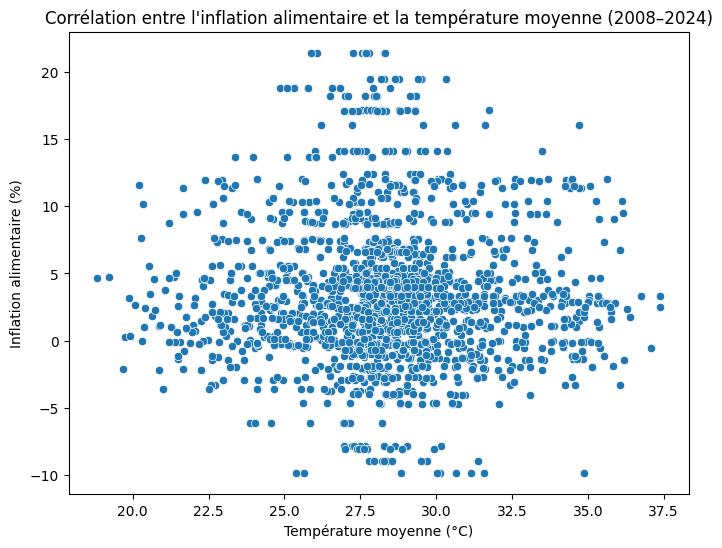

Corrélation inflation alimentaire – température moyenne : -0.011589941355935086


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import functions as F

# Filtrer la période et sélectionner les variables
pandas_df = (
    df_mensual_data
    .filter((F.col("Year") >= 2008) & (F.col("Year") <= 2024))
    .select("Year", "Month", "infl_food", "avg_tavg")
    .dropna()
    .toPandas()
)

# Créer une date mensuelle
pandas_df["date"] = pd.to_datetime(
    pandas_df["Year"].astype(str) + "-" +
    pandas_df["Month"].astype(str) + "-01"
)

# Trier dans le temps
pandas_df = pandas_df.sort_values("date")

# Graphique de dispersion (relation économique)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=pandas_df,
    x="avg_tavg",
    y="infl_food"
)

plt.title("Corrélation entre l'inflation alimentaire et la température moyenne (2008–2024)")
plt.xlabel("Température moyenne (°C)")
plt.ylabel("Inflation alimentaire (%)")
plt.show()

# Corrélation statistique
corr_value = pandas_df["infl_food"].corr(pandas_df["avg_tavg"])
print("Corrélation inflation alimentaire – température moyenne :", corr_value)


Graphique 1 : Corrélation entre l'inflation alimentaire et la température moyenne (2008–2024)

L'analyse du graphique montre qu'il n'y a pas corrélation visible entre l’inflation alimentaire et la température moyenne. En effet, le coeficient de corrélation est de -0,011. Ceci montre que les variations de température moyenne n’influencent pas directement l’inflation alimentaire au Sénégal.

#### 4.2. Corrélation entre l'inflation alimentaire et la température maximale

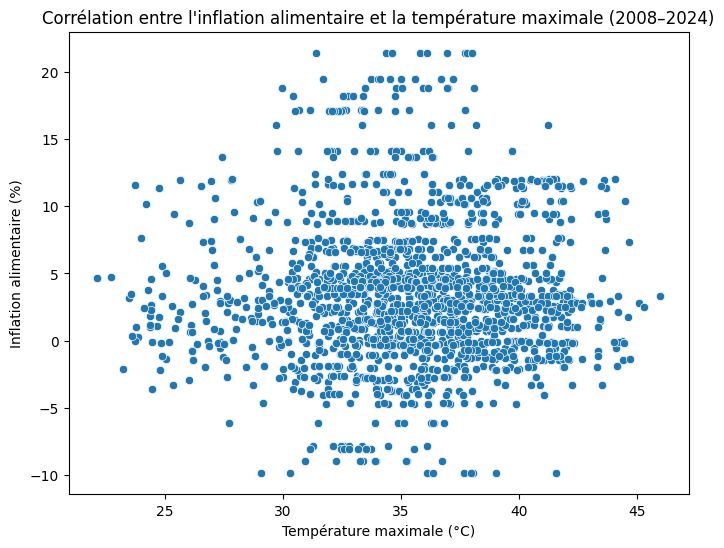

Corrélation inflation alimentaire – température maximale : 0.002554192948545335


In [0]:
# Filtrer la période et sélectionner les variables
pandas_df = (
    df_mensual_data
    .filter((F.col("Year") >= 2008) & (F.col("Year") <= 2024))
    .select("Year", "Month", "infl_food", "avg_tmax")
    .dropna()
    .toPandas()
)

# Créer une date mensuelle
pandas_df["date"] = pd.to_datetime(
    pandas_df["Year"].astype(str) + "-" +
    pandas_df["Month"].astype(str) + "-01"
)

# Trier dans le temps
pandas_df = pandas_df.sort_values("date")

# Graphique de dispersion
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=pandas_df,
    x="avg_tmax",
    y="infl_food"
)

plt.title("Corrélation entre l'inflation alimentaire et la température maximale (2008–2024)")
plt.xlabel("Température maximale (°C)")
plt.ylabel("Inflation alimentaire (%)")
plt.show()

# Corrélation statistique
corr_value = pandas_df["infl_food"].corr(pandas_df["avg_tmax"])
print("Corrélation inflation alimentaire – température maximale :", corr_value)


GRAPHIQUE 2 : Corrélation entre l'inflation alimentaire et la température maximale (2008–2024)

L'analyse du graphique montre qu'il n'y a pas corrélation visible entre l’inflation alimentaire et la température maximale. En effet, le coeficient de corrélation est de 0,002. Ceci montre que la dispersion aléatoire des points confirme que même les pics de chaleur n'impactent pas systématiquement l'inflation alimentaire.


#### 4.3. Corrélation entre l'inflation alimentaire et la température minimale

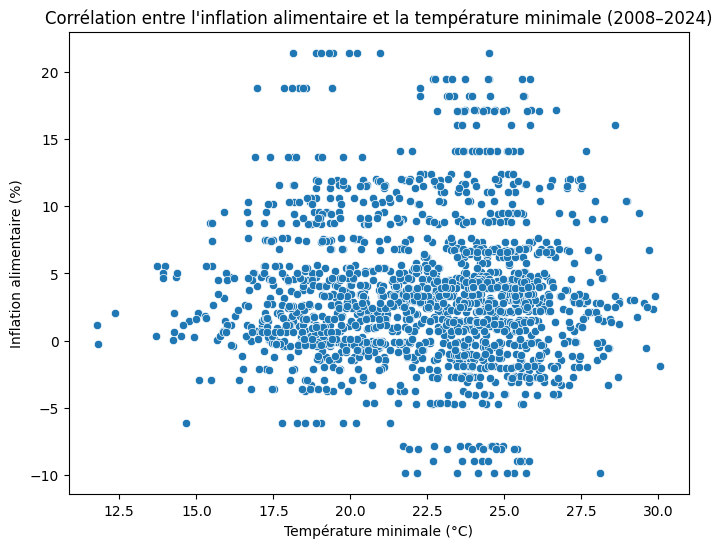

Corrélation inflation alimentaire – température minimale : -0.005019637723278688


In [0]:
# Filtrer la période et sélectionner les variables
pandas_df = (
    df_mensual_data
    .filter((F.col("Year") >= 2008) & (F.col("Year") <= 2024))
    .select("Year", "Month", "infl_food", "avg_tmin")  # <- ici avg_tmin
    .dropna()
    .toPandas()
)

# Créer une date mensuelle
pandas_df["date"] = pd.to_datetime(
    pandas_df["Year"].astype(str) + "-" +
    pandas_df["Month"].astype(str) + "-01"
)

# Trier dans le temps
pandas_df = pandas_df.sort_values("date")

# Graphique de dispersion
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=pandas_df,
    x="avg_tmin",  # <- ici avg_tmin
    y="infl_food"
)

plt.title("Corrélation entre l'inflation alimentaire et la température minimale (2008–2024)")
plt.xlabel("Température minimale (°C)")
plt.ylabel("Inflation alimentaire (%)")
plt.show()

# Corrélation statistique
corr_value = pandas_df["infl_food"].corr(pandas_df["avg_tmin"])  # <- ici avg_tmin
print("Corrélation inflation alimentaire – température minimale :", corr_value)


Graphique 3 : Corrélation entre l'inflation alimentaire et la température minimale (2008–2024)

L'analyse du graphique montre qu'il n'y a pas corrélation visible entre l’inflation alimentaire et la température minimale. En effet, le coeficient de corrélation est de -0,011. Ceci montre que les variations de température minimale n’influencent pas directement l’inflation alimentaire au Sénégal.

#### 4.4. Corrélation entre l'inflation alimentaire et les précipitations totales

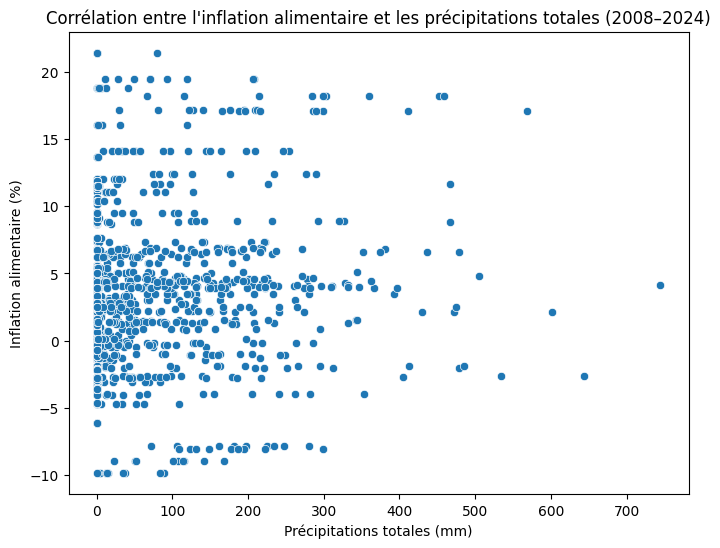

Corrélation inflation alimentaire – précipitations totales : 0.08266442455267597


In [0]:
# Filtrer la période et sélectionner les variables
pandas_df = (
    df_mensual_data
    .filter((F.col("Year") >= 2008) & (F.col("Year") <= 2024))
    .select("Year", "Month", "infl_food", "total_prcp")  # <- précipitations
    .dropna()
    .toPandas()
)

# Créer une date mensuelle
pandas_df["date"] = pd.to_datetime(
    pandas_df["Year"].astype(str) + "-" +
    pandas_df["Month"].astype(str) + "-01"
)

# Trier dans le temps
pandas_df = pandas_df.sort_values("date")

# Graphique de dispersion
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=pandas_df,
    x="total_prcp",  # <- précipitations sur l’axe X
    y="infl_food"
)

plt.title("Corrélation entre l'inflation alimentaire et les précipitations totales (2008–2024)")
plt.xlabel("Précipitations totales (mm)")
plt.ylabel("Inflation alimentaire (%)")
plt.show()

# Corrélation statistique
corr_value = pandas_df["infl_food"].corr(pandas_df["total_prcp"])
print("Corrélation inflation alimentaire – précipitations totales :", corr_value)


Graphique 4 : Corrélation entre l'inflation alimentaire et les précipitations totales (2008–2024)

L'analyse du graphique montre qu'il y a une tendance positive entre les deux variables. En effet, le coeficient de corrélation est de 0,083. C'est-à-dire, les fortes pluies peuvent exercer une pression inflationniste modérée au Sénégal.

#### 4.5. Corrélation entre l’indice des prix à la consommation et la température moyenne

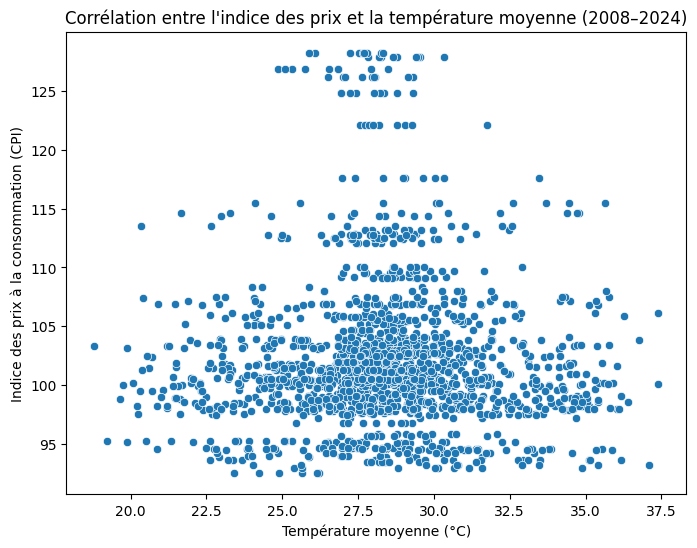

Corrélation CPI – température moyenne : -0.010269395051963953


In [0]:
# Filtrer la période et sélectionner les variables
pandas_df = (
    df_mensual_data
    .filter((F.col("Year") >= 2008) & (F.col("Year") <= 2024))
    .select("Year", "Month", "cpi", "avg_tavg")  # CPI et température moyenne
    .dropna()
    .toPandas()
)

# Créer une date mensuelle pour tri
pandas_df["date"] = pd.to_datetime(
    pandas_df["Year"].astype(str) + "-" +
    pandas_df["Month"].astype(str) + "-01"
)
pandas_df = pandas_df.sort_values("date")

# Graphique de dispersion
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pandas_df, x="avg_tavg", y="cpi")
plt.title("Corrélation entre l'indice des prix et la température moyenne (2008–2024)")
plt.xlabel("Température moyenne (°C)")
plt.ylabel("Indice des prix à la consommation (CPI)")
plt.show()

# Corrélation statistique
corr_value = pandas_df["cpi"].corr(pandas_df["avg_tavg"])
print("Corrélation CPI – température moyenne :", corr_value)


Graphique 5 : Corrélation entre l'indice des prix et la température moyenne (2008–2024)

On voit que le coefficient de corrélation entre le niveau général des prix et la température moyenne est négatif, de valeur -0,010. Ce qui montre la dispersion uniforme et indépendant du niveau général des prix par rapport aux variations thermiques moyennes.



#### 4.6. Corrélation entre l’indice des prix à la consommation et température maximale



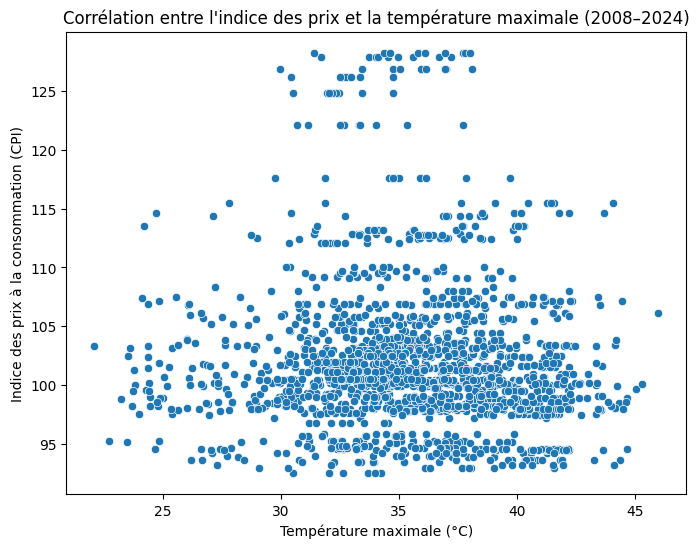

Corrélation CPI – température maximale : -0.061314720541660865


In [0]:
# Filtrer la période et sélectionner les variables
pandas_df = (
    df_mensual_data
    .filter((F.col("Year") >= 2008) & (F.col("Year") <= 2024))
    .select("Year", "Month", "cpi", "avg_tmax")  # CPI et température maximale
    .dropna()
    .toPandas()
)

# Créer une date mensuelle pour tri
pandas_df["date"] = pd.to_datetime(
    pandas_df["Year"].astype(str) + "-" +
    pandas_df["Month"].astype(str) + "-01"
)
pandas_df = pandas_df.sort_values("date")

# Graphique de dispersion
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pandas_df, x="avg_tmax", y="cpi")
plt.title("Corrélation entre l'indice des prix et la température maximale (2008–2024)")
plt.xlabel("Température maximale (°C)")
plt.ylabel("Indice des prix à la consommation (CPI)")
plt.show()

# Corrélation statistique
corr_value = pandas_df["cpi"].corr(pandas_df["avg_tmax"])
print("Corrélation CPI – température maximale :", corr_value)


Graphique 6 : Corrélation entre l'indice des prix et la température maximale (2008–2024)

On voit que le coefficient de corrélation entre le niveau général des prix et la température maximale est négatif, de valeur -0,061. Ce qui montre la dispersion uniforme et indépendant du niveau général des prix par rapport aux variations thermiques maximales.



#### 4.7. Corrélation entre l’indice des prix à la consommation et température minimale



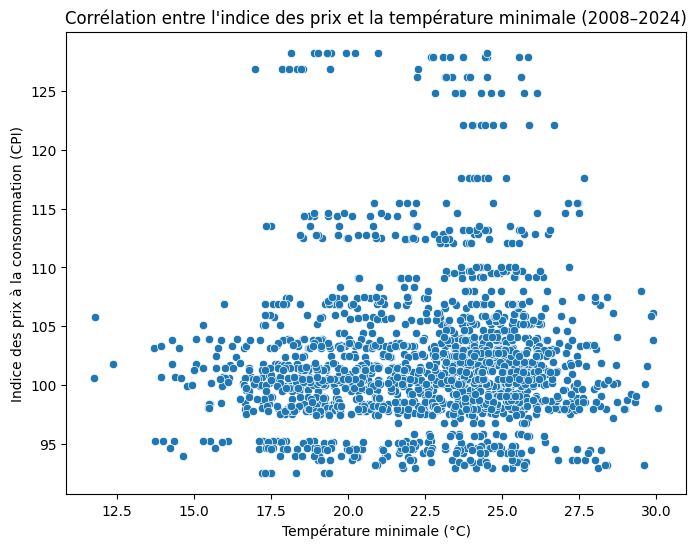

Corrélation CPI – température minimale : 0.059910385316105944


In [0]:
# Filtrer la période et sélectionner les variables
pandas_df = (
    df_mensual_data
    .filter((F.col("Year") >= 2008) & (F.col("Year") <= 2024))
    .select("Year", "Month", "cpi", "avg_tmin")  # CPI et température minimale
    .dropna()
    .toPandas()
)

# Créer une date mensuelle pour tri
pandas_df["date"] = pd.to_datetime(
    pandas_df["Year"].astype(str) + "-" +
    pandas_df["Month"].astype(str) + "-01"
)
pandas_df = pandas_df.sort_values("date")

# Graphique de dispersion
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pandas_df, x="avg_tmin", y="cpi")
plt.title("Corrélation entre l'indice des prix et la température minimale (2008–2024)")
plt.xlabel("Température minimale (°C)")
plt.ylabel("Indice des prix à la consommation (CPI)")
plt.show()

# Corrélation statistique
corr_value = pandas_df["cpi"].corr(pandas_df["avg_tmin"])
print("Corrélation CPI – température minimale :", corr_value)


Graphique 7 : Corrélation entre l'indice des prix et la température minimale (2008–2024)

On voit que le coefficient de corrélation entre le niveau général des prix et la température maximale est positif, de valeur 0,060. C'est-à-dire, il y a une faible corrélation positive entre les deux variables.


#### 4.8. Corrélation entre l'indice des prix et les précipitations totales

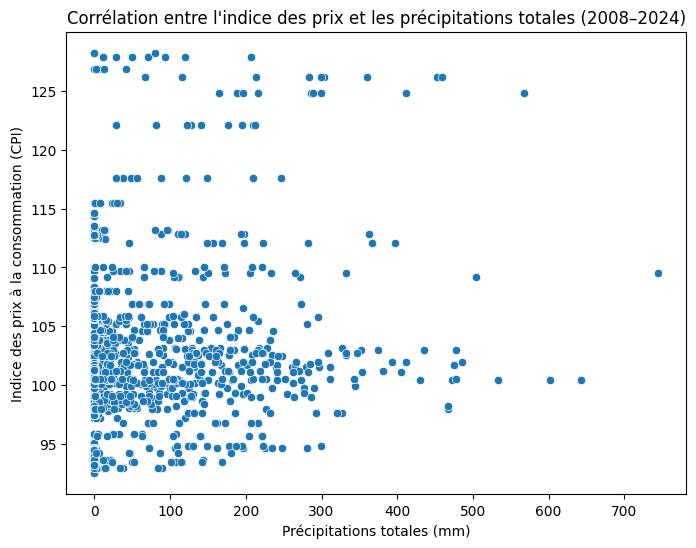

Corrélation CPI – précipitations totales : 0.16274759977264255


In [0]:
# Filtrer la période et sélectionner les variables
pandas_df = (
    df_mensual_data
    .filter((F.col("Year") >= 2008) & (F.col("Year") <= 2024))
    .select("Year", "Month", "cpi", "total_prcp")  # CPI et précipitations totales
    .dropna()
    .toPandas()
)

# Créer une date mensuelle pour tri
pandas_df["date"] = pd.to_datetime(
    pandas_df["Year"].astype(str) + "-" +
    pandas_df["Month"].astype(str) + "-01"
)
pandas_df = pandas_df.sort_values("date")

# Graphique de dispersion
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pandas_df, x="total_prcp", y="cpi")
plt.title("Corrélation entre l'indice des prix et les précipitations totales (2008–2024)")
plt.xlabel("Précipitations totales (mm)")
plt.ylabel("Indice des prix à la consommation (CPI)")
plt.show()

# Corrélation statistique
corr_value = pandas_df["cpi"].corr(pandas_df["total_prcp"])
print("Corrélation CPI – précipitations totales :", corr_value)


Graphique 8 : Corrélation entre l'indice des prix et les précipitations totales (2008–2024)

Entre les précipitations totales et le niveau général des prix au Sénégal, on trouve le coefficient de corrélation de valeur 0,163.



#### 4.9. Corrélation entre PIB constant et la température moyenne

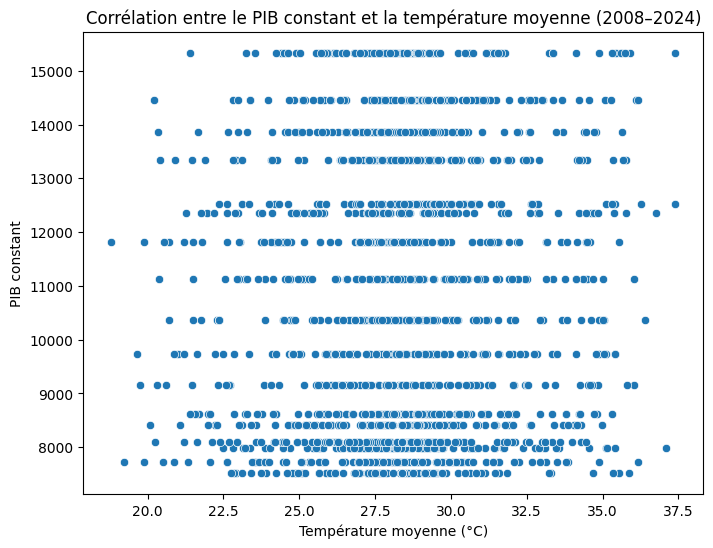

Corrélation PIB constant – température moyenne : 0.05925198707747281


In [0]:
# Filtrer la période et sélectionner les variables
pandas_df = (
    df_mensual_data
    .filter((F.col("Year") >= 2008) & (F.col("Year") <= 2024))
    .select("Year", "Month", "pib_constant", "avg_tavg")  # PIB constant et température moyenne
    .dropna()
    .toPandas()
)

# Créer une date mensuelle pour tri
pandas_df["date"] = pd.to_datetime(
    pandas_df["Year"].astype(str) + "-" +
    pandas_df["Month"].astype(str) + "-01"
)
pandas_df = pandas_df.sort_values("date")

# Graphique de dispersion
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pandas_df, x="avg_tavg", y="pib_constant")
plt.title("Corrélation entre le PIB constant et la température moyenne (2008–2024)")
plt.xlabel("Température moyenne (°C)")
plt.ylabel("PIB constant")
plt.show()

# Corrélation statistique
corr_value = pandas_df["pib_constant"].corr(pandas_df["avg_tavg"])
print("Corrélation PIB constant – température moyenne :", corr_value)


GRAPHIQUE 9 : Corrélation entre le PIB constant et la température moyenne (2008–2024)

L'analyse du graphique nous montre qu'il y a une faible corrélation entre le PIB constant et la température moyenne au Sénégal. En effet, le coefficient de corrélation est de 0,059.

#### 4.10. Corrélation entre PIB constant et la température maximale

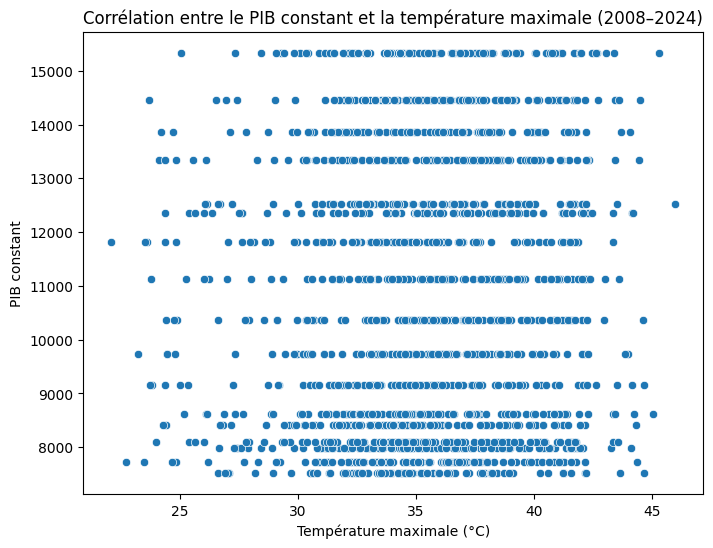

Corrélation PIB constant – température maximale : 0.047099771347368626


In [0]:
# Filtrer la période et sélectionner les variables
pandas_df = (
    df_mensual_data
    .filter((F.col("Year") >= 2008) & (F.col("Year") <= 2024))
    .select("Year", "Month", "pib_constant", "avg_tmax")  # PIB constant et température maximale
    .dropna()
    .toPandas()
)

# Créer une date mensuelle pour tri
pandas_df["date"] = pd.to_datetime(
    pandas_df["Year"].astype(str) + "-" +
    pandas_df["Month"].astype(str) + "-01"
)
pandas_df = pandas_df.sort_values("date")

# Graphique de dispersion
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pandas_df, x="avg_tmax", y="pib_constant")
plt.title("Corrélation entre le PIB constant et la température maximale (2008–2024)")
plt.xlabel("Température maximale (°C)")
plt.ylabel("PIB constant")
plt.show()

# Corrélation statistique
corr_value = pandas_df["pib_constant"].corr(pandas_df["avg_tmax"])
print("Corrélation PIB constant – température maximale :", corr_value)


GRAPHIQUE 10 : Corrélation entre le PIB constant et la température maximale (2008–2024)

L'analyse du graphique nous montre qu'il y a une faible corrélation entre le PIB constant et la température maximale au Sénégal. En effet, le coefficient de corrélation est de 0,047.

#### 4.11. Corrélation entre PIB constant et la température minimale


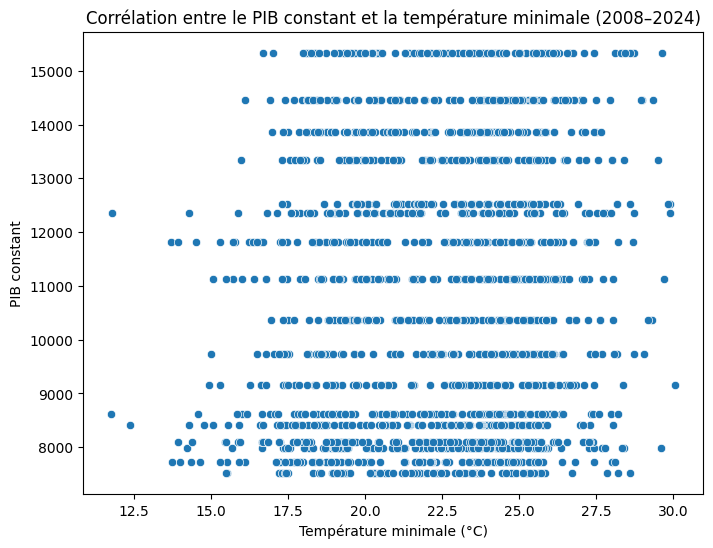

Corrélation PIB constant – température minimale : 0.09102044849905996


In [0]:
# Filtrer la période et sélectionner les variables
pandas_df = (
    df_mensual_data
    .filter((F.col("Year") >= 2008) & (F.col("Year") <= 2024))
    .select("Year", "Month", "pib_constant", "avg_tmin")  # PIB constant et température minimale
    .dropna()
    .toPandas()
)

# Créer une date mensuelle pour tri
pandas_df["date"] = pd.to_datetime(
    pandas_df["Year"].astype(str) + "-" +
    pandas_df["Month"].astype(str) + "-01"
)
pandas_df = pandas_df.sort_values("date")

# Graphique de dispersion
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pandas_df, x="avg_tmin", y="pib_constant")
plt.title("Corrélation entre le PIB constant et la température minimale (2008–2024)")
plt.xlabel("Température minimale (°C)")
plt.ylabel("PIB constant")
plt.show()

# Corrélation statistique
corr_value = pandas_df["pib_constant"].corr(pandas_df["avg_tmin"])
print("Corrélation PIB constant – température minimale :", corr_value)


GRAPHIQUE 11 : Corrélation entre le PIB constant et la température minimale (2008–2024)

L'analyse du graphique nous montre qu'il y a une faible corrélation entre le PIB constant et la température minimale au Sénégal. En effet, le coefficient de corrélation est de 0,091.

#### 4.12. Corrélation entre PIB constant et les précipitations totales


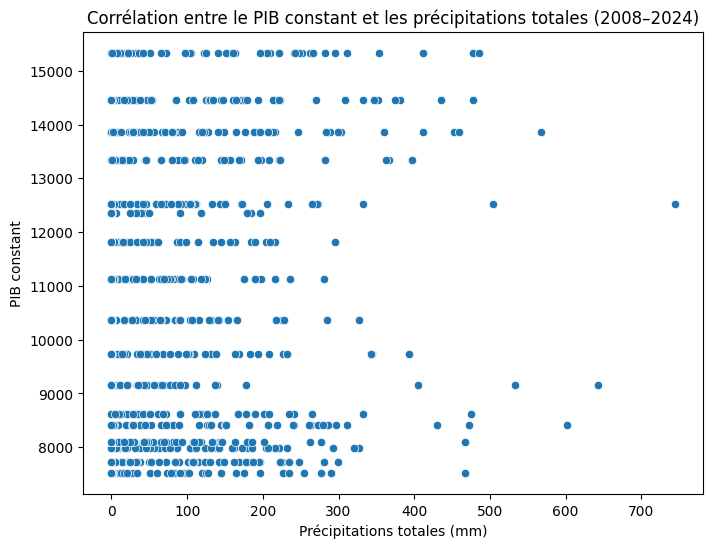

Corrélation PIB constant – précipitations totales : 0.06797802640650019


In [0]:
# Filtrer la période et sélectionner les variables
pandas_df = (
    df_mensual_data
    .filter((F.col("Year") >= 2008) & (F.col("Year") <= 2024))
    .select("Year", "Month", "pib_constant", "total_prcp")  # PIB constant et précipitations totales
    .dropna()
    .toPandas()
)

# Créer une date mensuelle pour tri
pandas_df["date"] = pd.to_datetime(
    pandas_df["Year"].astype(str) + "-" +
    pandas_df["Month"].astype(str) + "-01"
)
pandas_df = pandas_df.sort_values("date")

# Graphique de dispersion
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pandas_df, x="total_prcp", y="pib_constant")
plt.title("Corrélation entre le PIB constant et les précipitations totales (2008–2024)")
plt.xlabel("Précipitations totales (mm)")
plt.ylabel("PIB constant")
plt.show()

# Corrélation statistique
corr_value = pandas_df["pib_constant"].corr(pandas_df["total_prcp"])
print("Corrélation PIB constant – précipitations totales :", corr_value)


GRAPHIQUE 12 : Corrélation entre le PIB constant et les précipitations totales (2008–2024)

L'analyse du graphique nous montre qu'il y a une faible corrélation entre le PIB constant et les précipitations totales. En effet, le coefficient de corrélation est de 0,068.

### 5- Graphiques

In [0]:
# Sélection des variables utiles
time_vars = ["Year", "Month"] + meteo_vars + eco_vars

pandas_df_time = (
    df_mensual_data.select(time_vars)
      .dropna()
      .toPandas()
)

# Création d'une date
pandas_df_time["date"] = pd.to_datetime(
    pandas_df_time["Year"].astype(str) + "-" +
    pandas_df_time["Month"].astype(str) + "-01"
)

# Tri temporel
pandas_df_time = pandas_df_time.sort_values("date")

#### 5.1. Inflation alimentaire

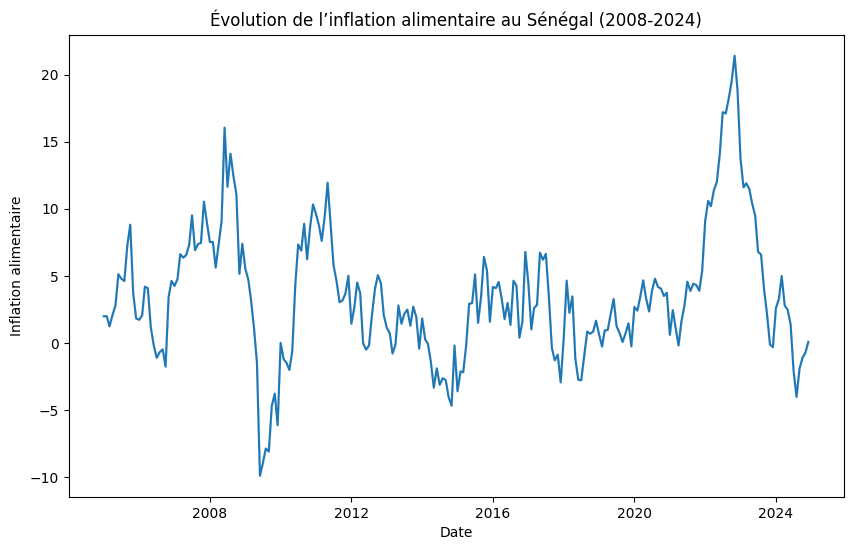

In [0]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=pandas_df_time,
    x="date",
    y="infl_food"
)
plt.title("Évolution de l’inflation alimentaire au Sénégal (2008-2024)")
plt.xlabel("Date")
plt.ylabel("Inflation alimentaire")
plt.show()

GRAPHIQUE 13 : Évolution de l'inflation alimentaire dans le temps

Ce graphique montre une volatilité historique extrême de l'inflation alimentaire. Ce qui révèle une économie sous tension alimentaire chronique. Les pics répétés (2008, 2011-2012, 2020, 2022) montrent une vulnérabilité persistante aux chocs internationaux (cours mondiaux) et climatiques. 


#### 5.2. CPI

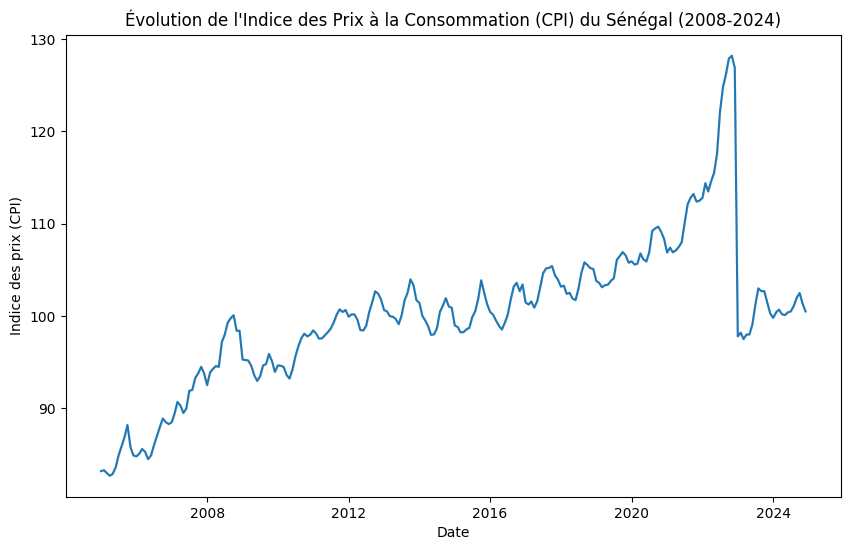

In [0]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=pandas_df_time,
    x="date",
    y="cpi"
)
plt.title("Évolution de l'Indice des Prix à la Consommation (CPI) du Sénégal (2008-2024)")
plt.xlabel("Date")
plt.ylabel("Indice des prix (CPI)")
plt.show()


GRAPHIQUE 14 : Évolution de l'Indice des Prix à la Consommation (CPI) du Sénégal (2008-2024)

La tendance haussière régulière mais modérée dessine une trajectoire inflationniste maîtrisée. Les accélérations temporaires coïncident avec les crises internationales, montrant l'ouverture économique et sa vulnérabilité. La modération relative par rapport à l'inflation alimentaire témoigne de l'efficacité partielle des politiques de stabilisation.


#### 5.3. PIB

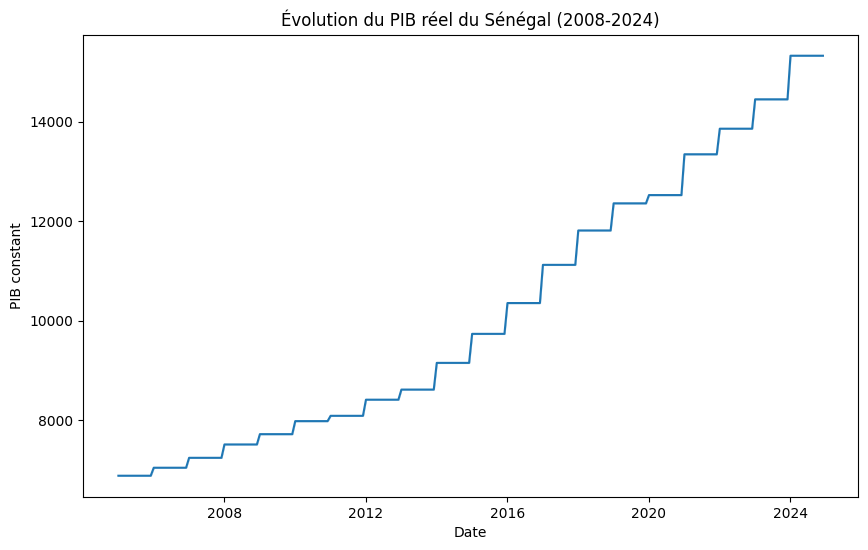

In [0]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=pandas_df_time,
    x="date",
    y="pib_constant"
)
plt.title("Évolution du PIB réel du Sénégal (2008-2024)")
plt.xlabel("Date")
plt.ylabel("PIB constant")
plt.show()


GRAPHIQUE 15 : Évolution du PIB réel du Sénégal (2008-2024)

Depuis deux décennies, le Sénégal connaît une croissance économique soutenue, marquée par un quasi-doublement du PIB réel qui témoigne d’une capacité structurelle à impulser une dynamique de développement auto-entretenue.

Cependant, cette trajectoire ascendante a été ponctuée de ralentissements passagers, notamment en 2009 avec la crise financière mondiale et en 2020 avec la pandémie de COVID-19.


#### 5.4. Températures moyennes

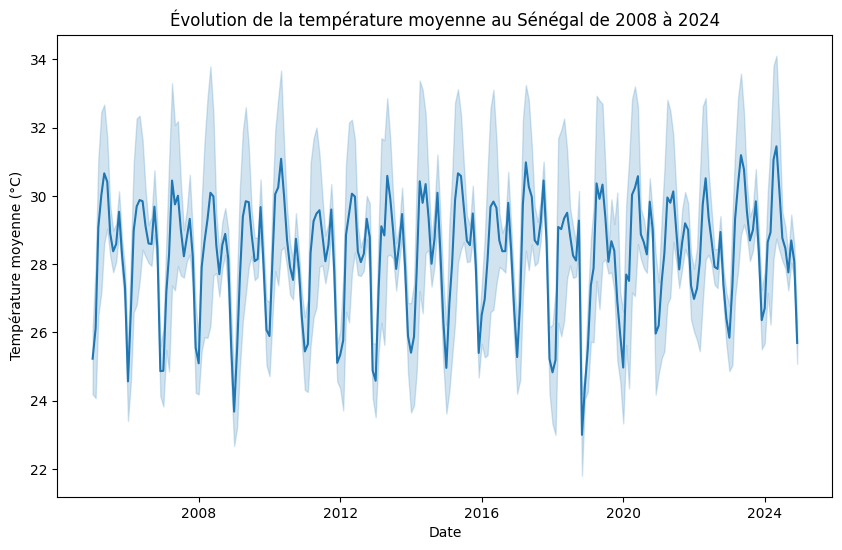

In [0]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=pandas_df_time,
    x="date",
    y="avg_tavg"
)
plt.title("Évolution de la température moyenne au Sénégal de 2008 à 2024")
plt.xlabel("Date")
plt.ylabel("Température moyenne (°C)")
plt.show()


GRAPHIQUE 16 : Évolution de la température moyenne au Sénégal de 2008 à 2024

À travers ce graphique, on observe une tendance générale au réchauffement des températures moyennes entre 2008 et 2024 au Sénégal, matérialisée par une série de pics successifs (2008, 2012, 2016, 2020, 2024) et confirmée par la courbe de moyenne mobile qui révèle une progression continue. Cette progression reflète l’impact du changement climatique sur le pays.

#### 5.5. Précipitations

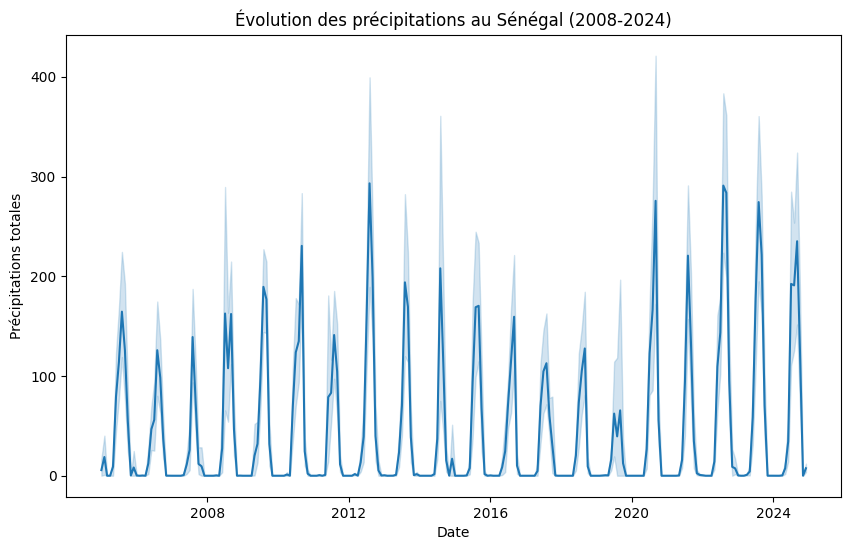

In [0]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=pandas_df_time,
    x="date",
    y="total_prcp"
)
plt.title("Évolution des précipitations au Sénégal (2008-2024)")
plt.xlabel("Date")
plt.ylabel("Précipitations totales")
plt.show()


GRAPHIQUE 17 : Évolution des précipitations au Sénégal (2008-2024) 

La saisonnalité extrême dessine une économie du temps limité. L’activité économique liée à l’eau (agriculture, hydroélectricité, certains services) est tendue sur 3-4 mois, conduisant à des goulots d’étranglement, des cycles de l’emploi saisonniers. À cela s’ajoute la variabilité interannuelle incitant au court-termisme et à l’aversion au risque pour les investissements à long terme. Économiquement, il apparaît ici un besoin pressant d’instituer des politiques de lissage : stockage de l’eau, développement d’activités complémentaires lorsqu’il ne pleut pas, instruments/financements de la gestion des risques liés au climat. Un défi majeur pour la transformation structurelle de l’économie.

#### 5.6. Graphique croisé

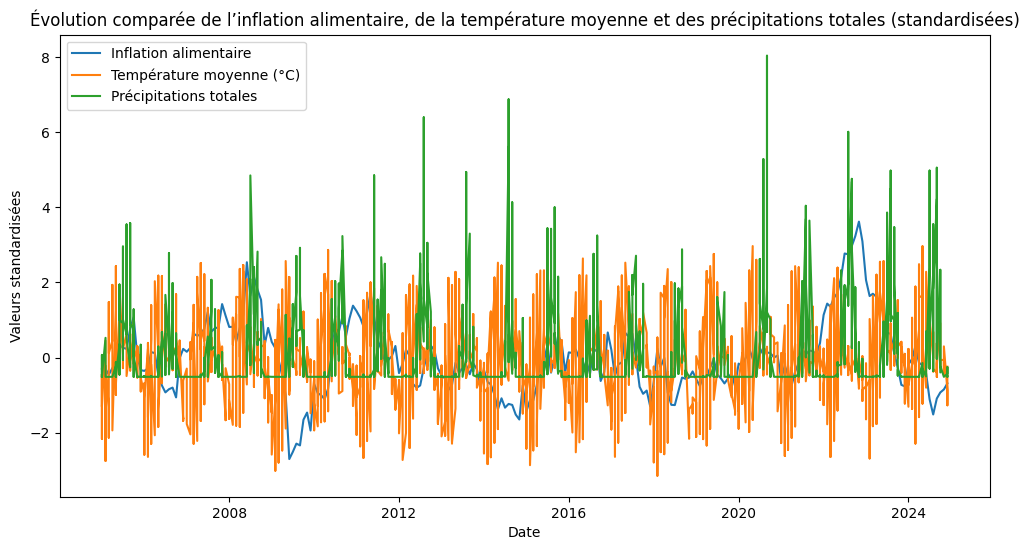

In [0]:
from sklearn.preprocessing import StandardScaler

cols_compare = ["infl_food", "avg_tavg", "total_prcp"]

scaled_df = pandas_df_time[["date"] + cols_compare].copy()

scaler = StandardScaler()
scaled_df[cols_compare] = scaler.fit_transform(scaled_df[cols_compare])

plt.figure(figsize=(12, 6))
for col in cols_compare:
       plt.plot(scaled_df["date"], scaled_df[col], label=labels[col])

plt.legend()
plt.title("Évolution comparée de l’inflation alimentaire, de la température moyenne et des précipitations totales (standardisées)")
plt.xlabel("Date")
plt.ylabel("Valeurs standardisées")
plt.show()


GRAPHIQUE 18 : Évolution comparée de l’inflation alimentaire, de la température moyenne et des précipitations totales (standardisées) 

La mise en concordance des trois séries d’indicateurs permet d’obtenir une lecture consolidée de la vulnérabilité économique face à la variance climatique. Le déphasage entre les pics de pluviométrie et le mouvement des prix alimentaires témoigne du temps économique de la production agricole. La volatilité excessive de l’inflation alimentaire met en évidence la nécessité politique prioritaire d’avoir une sécurité alimentaire.

### **Résumé**

Les données mensuelles de 2005 à 2024 (2039 observations) permettent d’analyser de manière fiable les dynamiques économiques et climatiques au Sénégal sur deux décennies. Sur le plan économique, le secteur agroalimentaire présente une forte volatilité, avec un indice de production industrielle alimentaire très dispersé, tandis que le PIB réel croît globalement mais avec des fluctuations importantes au cours de la période. L’inflation alimentaire est positive mais instable, contrastant avec les autres composantes du CPI plus stables, ce qui souligne le rôle central des produits alimentaires dans l’inflation, notamment lors des périodes de crises ou de chocs climatiques (2008, 2011‑2012, 2020, 2022). Côté climat, les températures moyennes élevées et les extrêmes thermiques, ainsi que la forte variabilité des précipitations, peuvent affecter la production agricole et les chaînes d’approvisionnement à différentes périodes de l’année, tandis que la vitesse du vent et la pression atmosphérique restent plus stables mais complètent la caractérisation du climat. Globalement, le climat constitue une source structurelle d’incertitude pour l’économie, justifiant l’étude des interactions entre variables climatiques, inflation et activité économique.

L’analyse des corrélations entre variables économiques (inflation alimentaire, CPI, PIB réel, indices de production industrielle) et climatiques (températures, précipitations, vent, pression) montre des relations globalement faibles. Les températures présentent des corrélations proches de zéro avec l’inflation, le CPI et le PIB, tandis que les précipitations totales ont des corrélations modestes avec l’inflation alimentaire (0,074) et le CPI (0,147), reflétant des effets limités via la production, le transport et les coûts logistiques, atténués par les stocks et les importations. La vitesse du vent et la pression atmosphérique exercent un impact marginal. Ces résultats indiquent que l’économie sénégalaise, malgré la variabilité climatique, a développé une résilience notable grâce à la diversification sectorielle, aux infrastructures adaptées et aux mécanismes de régulation des marchés, justifiant le recours à des instruments économiques innovants (assurances, marchés de l’eau, obligations climatiques) pour renforcer la stabilité et soutenir un développement durable.

AUTRES ANALYSES

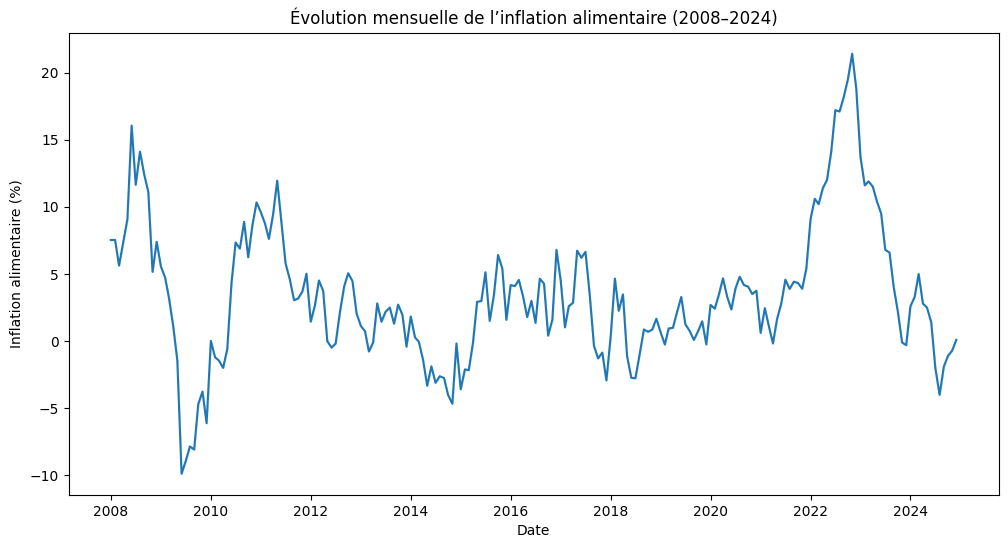

In [0]:
# =========================================
# ÉVOLUTION MENSUELLE DE L’INFLATION ALIMENTAIRE (2008–2024)
# =========================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import functions as F

# 1️⃣ Filtrer la période et sélectionner les variables utiles
pandas_df_infl = (
    df_mensual_data
    .filter((F.col("Year") >= 2008) & (F.col("Year") <= 2024))
    .select("Year", "Month", "infl_food")
    .dropna()
    .toPandas()
)

# 2️⃣ Créer une date mensuelle
pandas_df_infl["date"] = pd.to_datetime(
    pandas_df_infl["Year"].astype(str) + "-" +
    pandas_df_infl["Month"].astype(str) + "-01"
)

# 3️⃣ Trier chronologiquement
pandas_df_infl = pandas_df_infl.sort_values("date")

# 4️⃣ Graphique d’évolution mensuelle
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=pandas_df_infl,
    x="date",
    y="infl_food"
)

plt.title("Évolution mensuelle de l’inflation alimentaire (2008–2024)")
plt.xlabel("Date")
plt.ylabel("Inflation alimentaire (%)")
plt.show()




In [0]:
from pyspark.sql import functions as F

infl_food_time = (
    df_mensual_data
    .filter((F.col("Year") >= 2008) & (F.col("Year") <= 2024))
    .groupBy("Year", "Month")
    .agg(F.avg("infl_food").alias("avg_infl_food"))
    .orderBy("Year", "Month")
)

display(infl_food_time)



Year,Month,avg_infl_food
2008,1,7.53
2008,2,7.54
2008,3,5.63
2008,4,7.37
2008,5,9.07
2008,6,16.05
2008,7,11.64
2008,8,14.11
2008,9,12.409999999999998
2008,10,11.099999999999998
